In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 6 0 ... 3 6 6] [5 6 3 ... 6 9 2]
0.10939024390243902
Iteration:  10
[0 6 0 ... 6 6 7] [5 6 3 ... 6 9 2]
0.18878048780487805
Iteration:  20
[0 6 0 ... 6 6 7] [5 6 3 ... 6 9 2]
0.2748536585365854
Iteration:  30
[0 6 8 ... 6 6 7] [5 6 3 ... 6 9 2]
0.3488780487804878
Iteration:  40
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.4086341463414634
Iteration:  50
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.46431707317073173
Iteration:  60
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.5343414634146342
Iteration:  70
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.5872439024390244
Iteration:  80
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.6230975609756098
Iteration:  90
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.6508536585365854
Iteration:  100
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.6738536585365854
Iteration:  110
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.6912195121951219
Iteration:  120
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.7072439024390244
Iteration:  130
[0 6 8 ... 6 8 7] [5 6 3 ... 6 9 2]
0.7193658536585366
Iteration:  14

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


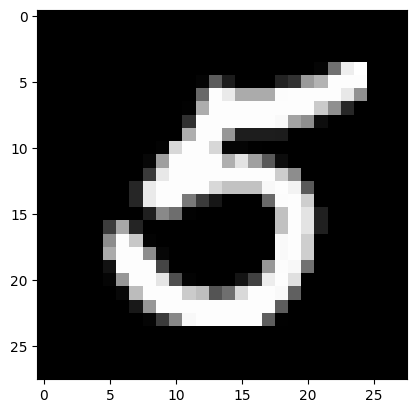

Prediction:  [6]
Label:  6


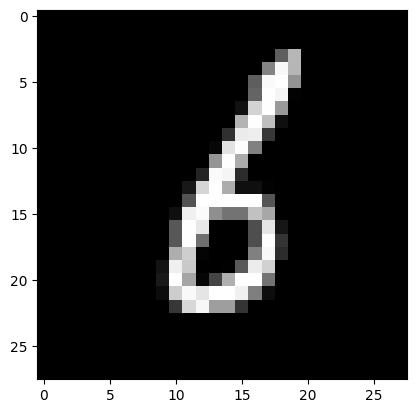

Prediction:  [8]
Label:  3


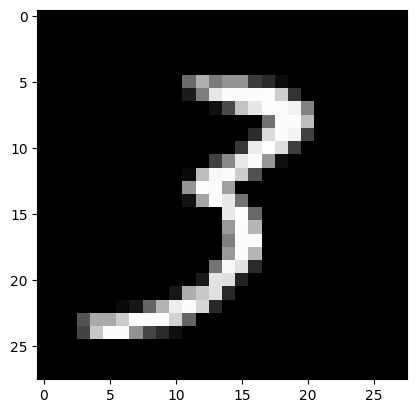

Prediction:  [6]
Label:  6


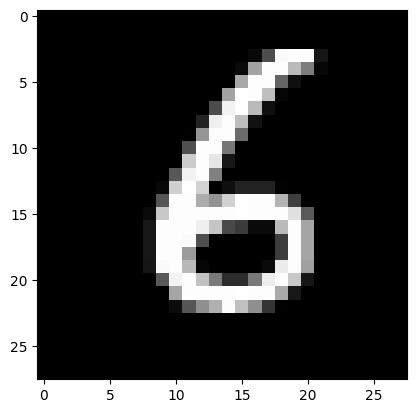

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [15]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 8 3 4 5 8 4 7 6 3 9 4 8 6 0 4 0 5 7 3 5 5 0 7 5 1 7 8 9 6 4 7 5 1 4 2 3
 3 5 3 7 6 4 6 3 2 5 2 4 0 4 8 8 3 1 6 7 6 6 1 6 8 4 9 5 6 8 4 1 9 7 2 8 4
 9 4 3 6 4 7 5 6 6 7 8 4 3 3 3 6 9 9 3 4 0 7 2 7 2 0 0 2 3 8 5 2 2 6 5 6 4
 9 0 7 9 0 9 3 7 1 2 7 9 0 0 4 5 1 7 7 9 4 4 5 6 9 6 4 7 7 4 6 5 0 1 2 3 7
 8 2 9 8 2 8 6 5 0 9 5 9 8 3 4 7 7 3 2 2 9 8 2 2 1 7 0 3 6 9 8 0 7 3 6 2 7
 0 0 6 9 1 0 5 7 2 9 0 4 9 7 3 3 9 3 4 1 3 2 0 1 2 2 4 9 4 0 5 2 4 6 6 9 7
 8 7 9 1 8 8 6 9 1 7 4 4 0 7 3 9 3 5 5 2 6 7 6 0 5 1 9 7 8 2 6 3 9 8 6 5 7
 5 7 4 3 8 4 8 2 6 6 0 6 8 9 3 7 2 1 4 8 5 6 7 7 4 2 6 4 6 0 9 7 6 1 1 1 0
 1 0 6 8 4 3 0 0 1 2 8 2 3 1 3 0 2 9 7 1 8 9 4 6 1 8 0 6 6 0 9 5 3 8 0 5 4
 0 2 0 9 3 4 0 9 7 8 6 0 5 7 3 4 3 8 0 3 8 7 3 8 4 2 1 7 9 6 5 1 0 1 4 0 4
 0 4 8 2 4 4 3 7 5 1 5 9 7 0 4 2 1 8 5 0 4 6 8 6 8 3 6 7 0 0 2 9 8 4 4 7 9
 9 5 4 5 8 7 0 1 1 5 0 0 5 2 2 8 6 5 9 7 6 2 6 1 1 2 9 4 2 0 7 5 2 4 9 0 6
 3 5 2 3 4 4 8 6 4 0 3 4 3 1 0 3 8 3 1 7 8 6 4 5 3 6 4 4 5 2 3 1 9 7 6 3 4
 6 5 6 8 4 0 3 0 4 3 9 6 

np.float64(0.857)